### Import libaries

In [39]:
import gc
import sys
import os 
import numpy as np 
import pandas as pd 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [36]:
home = os.path.expanduser("~")
sys.path.append(f"{home}/Documents/projects/CarPriceRegression/Machine_Learning/scripts/")

In [37]:
from util import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Import data and split into train and test

In [4]:
data = pd.read_csv(f"{home}/Documents/projects/CarPriceRegression/Processed_Data/car_onehot_data.csv")
features, y = data.drop("price",axis=1), data.price
X_train, X_test, y_train, y_test = train_test_split(features,y,test_size=0.2,random_state=2020)

### garbage collect

In [6]:
gc.collect()
%reset -f out

Flushing output cache (1 entries)


----
### Decision tree classifer 

* base model 

In [7]:
base_model = DecisionTreeRegressor(random_state=2020)

In [8]:
base_model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=2020)

In [14]:
regression_metrics(base_model,X_train,y_train,X_test,y_test)

r2_score         rmse  price_diff_abs_max
train   0.95769  2026.726437          462.969925
test    0.93004  2624.082763          462.969925

### Much better as compared to a linear regression model with elasticnet regularization. 

### Let's perform gridsearch to see if we can further improve the result

#### Key parameters:
  * max_depth: default None
  * min_samples_split: repeat of max_depth, default 2 
  * min_samples_leaf:default 1 
  * max_features: default None (n_features)

In [15]:
params = {
    "max_features":["auto",0.8,"sqrt","log2"]
}

In [16]:
searchGrid = GridSearchCV(base_model,params,scoring="r2",n_jobs=22)

In [17]:
searchGrid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=2020), n_jobs=22,
             param_grid={'max_features': ['auto', 0.8, 'sqrt', 'log2']},
             scoring='r2')

In [18]:
searchGrid.best_params_, searchGrid.best_score_

({'max_features': 'auto'}, 0.9285933079082547)

In [19]:
regression_metrics(searchGrid.best_estimator_,X_train,y_train,X_test,y_test)

r2_score         rmse  price_diff_abs_max
train   0.95769  2026.726437          462.969925
test    0.93004  2624.082763          462.969925

### Let's look at feature importance

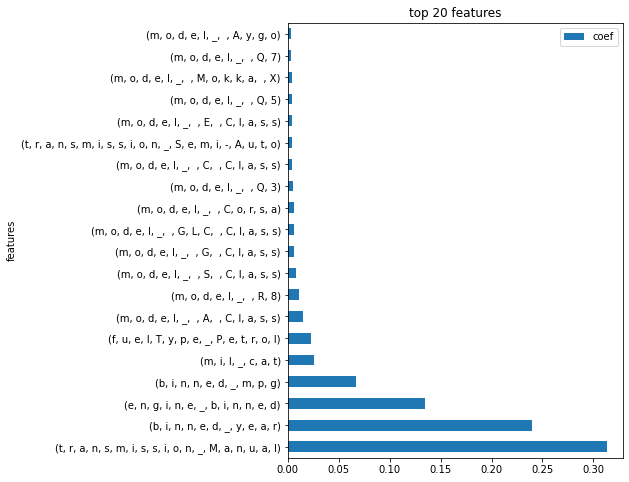

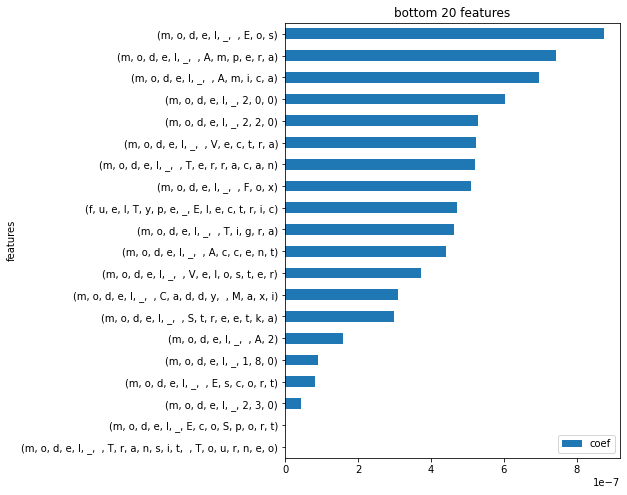

features         score
0                    (b, i, n, n, e, d, _, y, e, a, r)  2.397182e-01
1                                (m, i, l, _, c, a, t)  2.534020e-02
2                       (b, i, n, n, e, d, _, m, p, g)  6.668957e-02
3              (e, n, g, i, n, e, _, b, i, n, n, e, d)  1.344734e-01
4        (m, o, d, e, l, _,  , 2,  , S, e, r, i, e, s)  2.049467e-03
..                                                 ...           ...
201  (t, r, a, n, s, m, i, s, s, i, o, n, _, S, e, ...  3.911290e-03
202  (f, u, e, l, T, y, p, e, _, E, l, e, c, t, r, ...  4.709169e-07
203      (f, u, e, l, T, y, p, e, _, H, y, b, r, i, d)  8.712674e-04
204         (f, u, e, l, T, y, p, e, _, O, t, h, e, r)  9.163721e-05
205      (f, u, e, l, T, y, p, e, _, P, e, t, r, o, l)  2.269404e-02

[206 rows x 2 columns]

In [22]:
linear_feature_importance(X_train,base_model,True)

### feature importance ranking is quite different from linear regression model.
### Let's look at the tree

In [47]:
text_representation = tree.export_text(base_model, feature_names=list(features.columns))
print(text_representation)

|--- transmission_Manual <= 0.50
|   |--- binned_year <= 3.50
|   |   |--- engine_binned <= 0.50
|   |   |   |--- binned_year <= 2.50
|   |   |   |   |--- binned_year <= 1.50
|   |   |   |   |   |--- model_ Q5 <= 0.50
|   |   |   |   |   |   |--- binned_mpg <= 2.50
|   |   |   |   |   |   |   |--- mil_cat <= 4.50
|   |   |   |   |   |   |   |   |--- model_ Tiguan <= 0.50
|   |   |   |   |   |   |   |   |   |--- model_ X1 <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- model_ A6 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 27
|   |   |   |   |   |   |   |   |   |   |--- model_ A6 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [8995.00]
|   |   |   |   |   |   |   |   |   |--- model_ X1 >  0.50
|   |   |   |   |   |   |   |   |   |   |--- mil_cat <= 3.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [8995.00]
|   |   |   |   |   |   |   |   |   |   |--- mil_cat >  3.50
|   |   |   |   |   |   |   |   |   |   |   |--- v

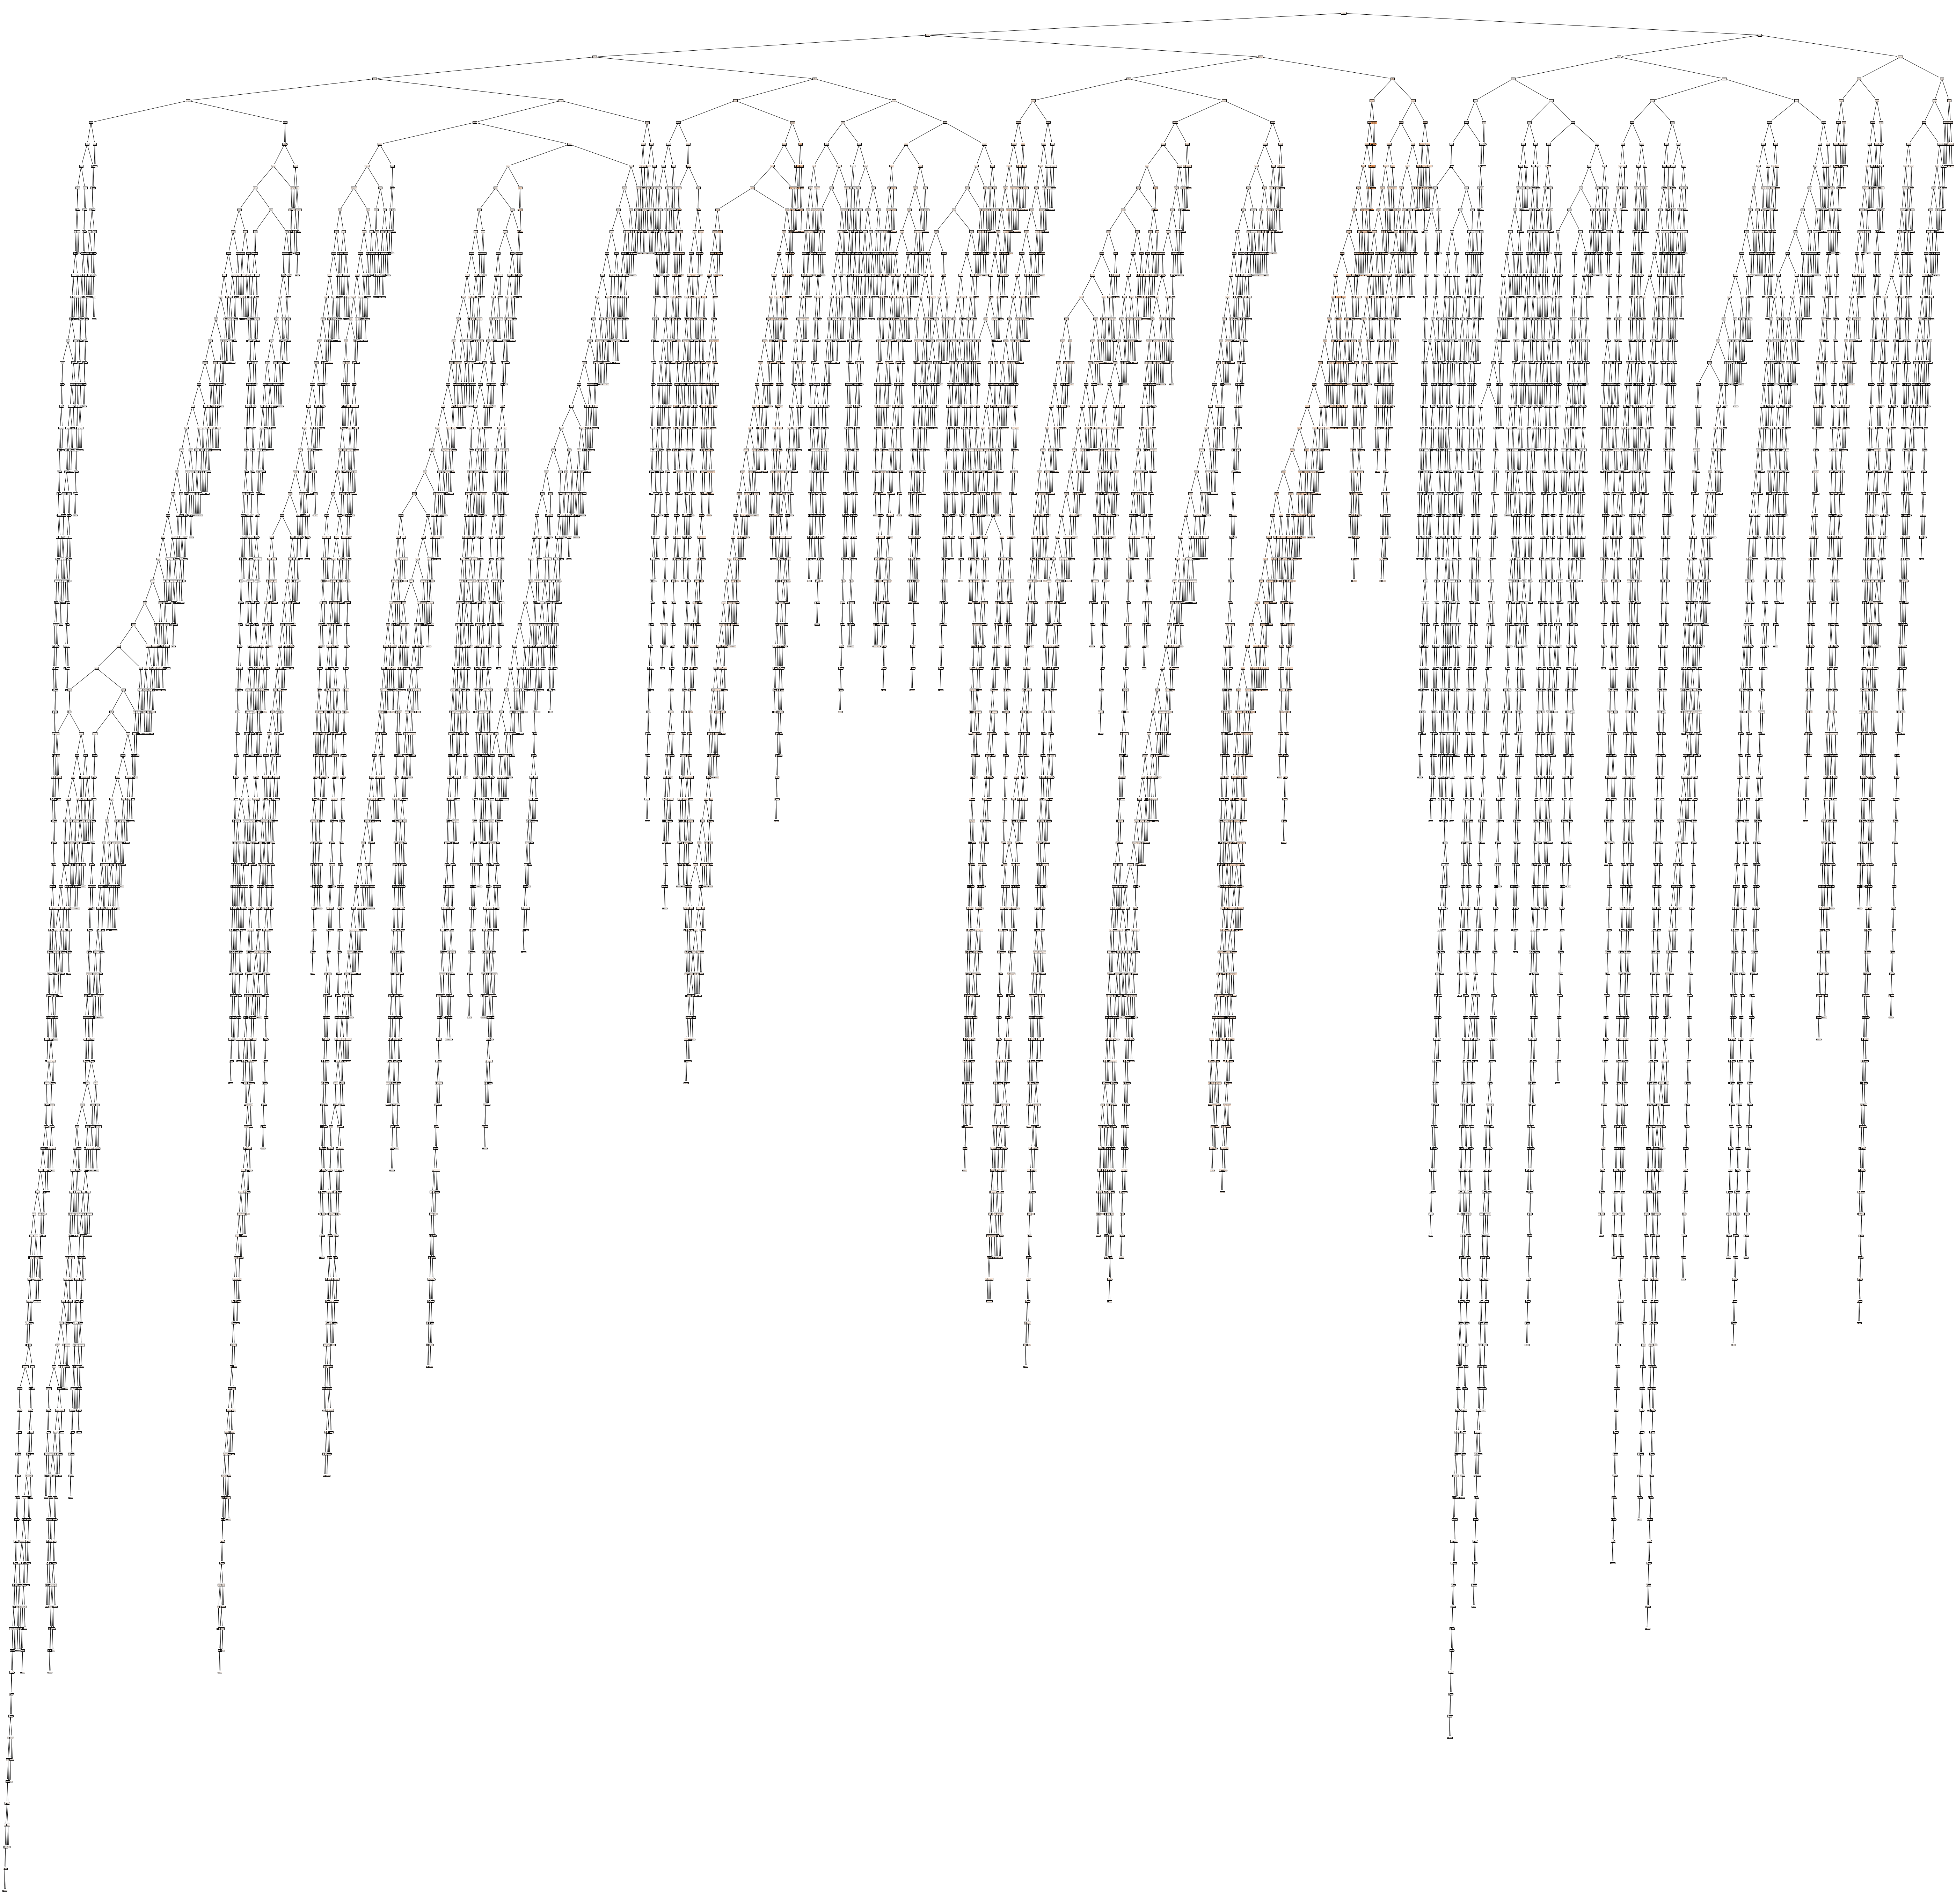

In [43]:
fig = plt.figure(figsize=(100,100))
_ = plot_tree(base_model, 
                   feature_names=features.columns,  
                   class_names="price",
                   filled=True)

### Let's see if an ensemble method would improve the outcome

In [48]:
base_forest = RandomForestRegressor(random_state=2020)

In [ ]:
base_forest.fit(X_train,y_train)

In [ ]:
regression_metrics()